<a href="https://colab.research.google.com/github/Mudit5/18-AUG-22/blob/main/APPLICATION%20OF%20MACHINE%20LEARNING%20MODEL%20IN%20STOCK%20PRICE%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import os
import yfinance as yf
import pandas as pd
start = '2020-01-01'
end = '2022-12-31'

now = datetime.datetime.today().strftime('%d_%m_%Y')

folder_name = "Datasets"
os.makedirs(folder_name, exist_ok=True)
stock_code = ['ADBE', 'AMZN', 'UBER', 'WMT', 'AAPL']

for stock in stock_code:
    data = yf.download(stock, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
    df = pd.DataFrame(data)
    df.to_csv(f'{folder_name}//{title}_{now}.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from IPython.display import Markdown

In [ ]:
Markdown("""
Data source: yfinance\n
- ADBE (01/01/2020 - 31/12/2022)\n
- AMZN (01/01/2020 - 31/12/2022)\n
- UBER (01/01/2020 - 31/12/2022)\n
- WMT (01/01/2020 - 31/12/2022)\n
""")


Data source: yfinance

- ADBE (01/01/2020 - 31/12/2022)

- AMZN (01/01/2020 - 31/12/2022)

- UBER (01/01/2020 - 31/12/2022)

- WMT (01/01/2020 - 31/12/2022)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from IPython.display import Markdown

# LSTM for forecasting
from keras.models import Sequential
from keras.layers import Dense, LSTM

import yfinance as yf

sns.set_theme(style="whitegrid")

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [ ]:
stock_list = ['adbe', 'amzn', 'uber', 'wmt']
stock_code = ['ADBE', 'AMZN', 'UBER', 'WMT']
stock_ma = ['adbe_ma', 'amzn_ma', 'uber_ma', 'wmt_ma']
com_list = []

In [ ]:
for x, y, z in zip(stock_list, stock_code, stock_ma):
    globals()[x] = pd.read_csv(f'Datasets//{y}_01_08_2023.csv', encoding='utf-8')
    globals()[x]['Date'] = pd.to_datetime(globals()[x]['Date'])
    globals()[x]['Volume'] = globals()[x]['Volume'].astype(int)
    globals()[z] = globals()[x]
    globals()[z] =  globals()[z].set_index('Date')
    com_list.append(globals()[z])

df = pd.concat(com_list, axis=0)

In [ ]:
adbe.head()


,Date,Open,High,Low,Adj Close,Volume
0,2020-01-02,330.000000,334.480011,329.170013,334.429993,1990100
1,2020-01-03,329.170013,332.980011,328.690002,331.809998,1577600
2,2020-01-06,328.290009,333.910004,328.190002,333.709991,1874700
3,2020-01-07,334.149994,334.790009,332.309998,333.390015,2500800
4,2020-01-08,333.809998,339.230011,333.399994,337.869995,2248500


In [ ]:
adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Adj Close  756 non-null    float64       
 5   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.6 KB


In [ ]:
amzn.head()

,Date,Open,High,Low,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000


In [ ]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Adj Close  756 non-null    float64       
 5   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.6 KB


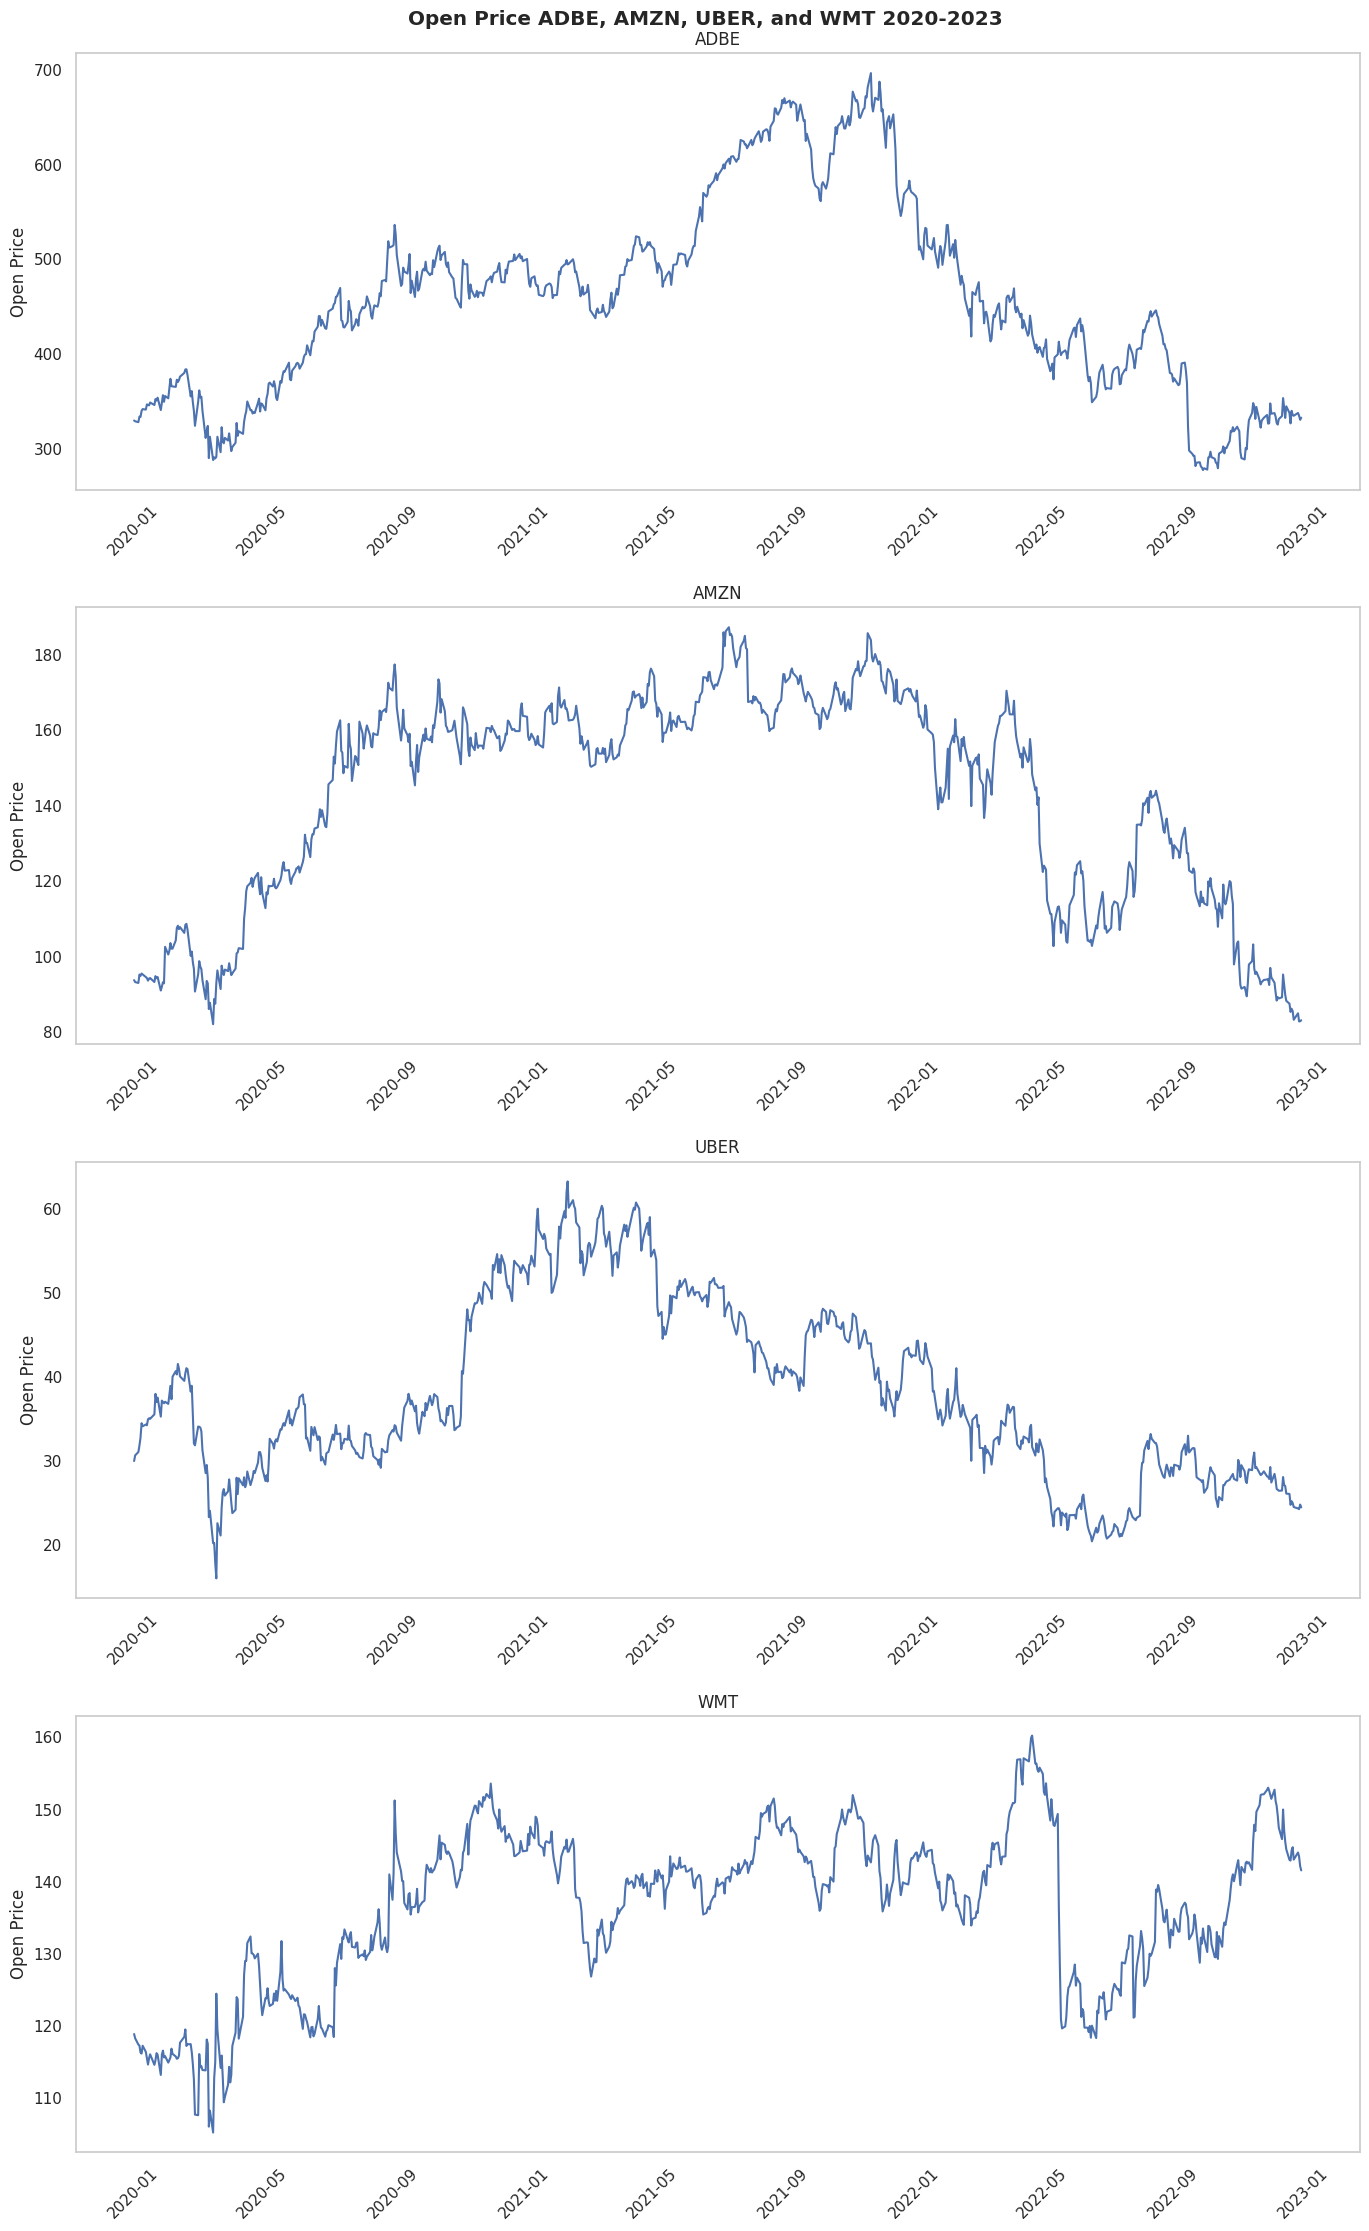

In [ ]:
chart = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2023'

Markdown(""" ### {title} """.format(title=chart))
fig, axes = plt.subplots(4, 1, figsize=(15, 23))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

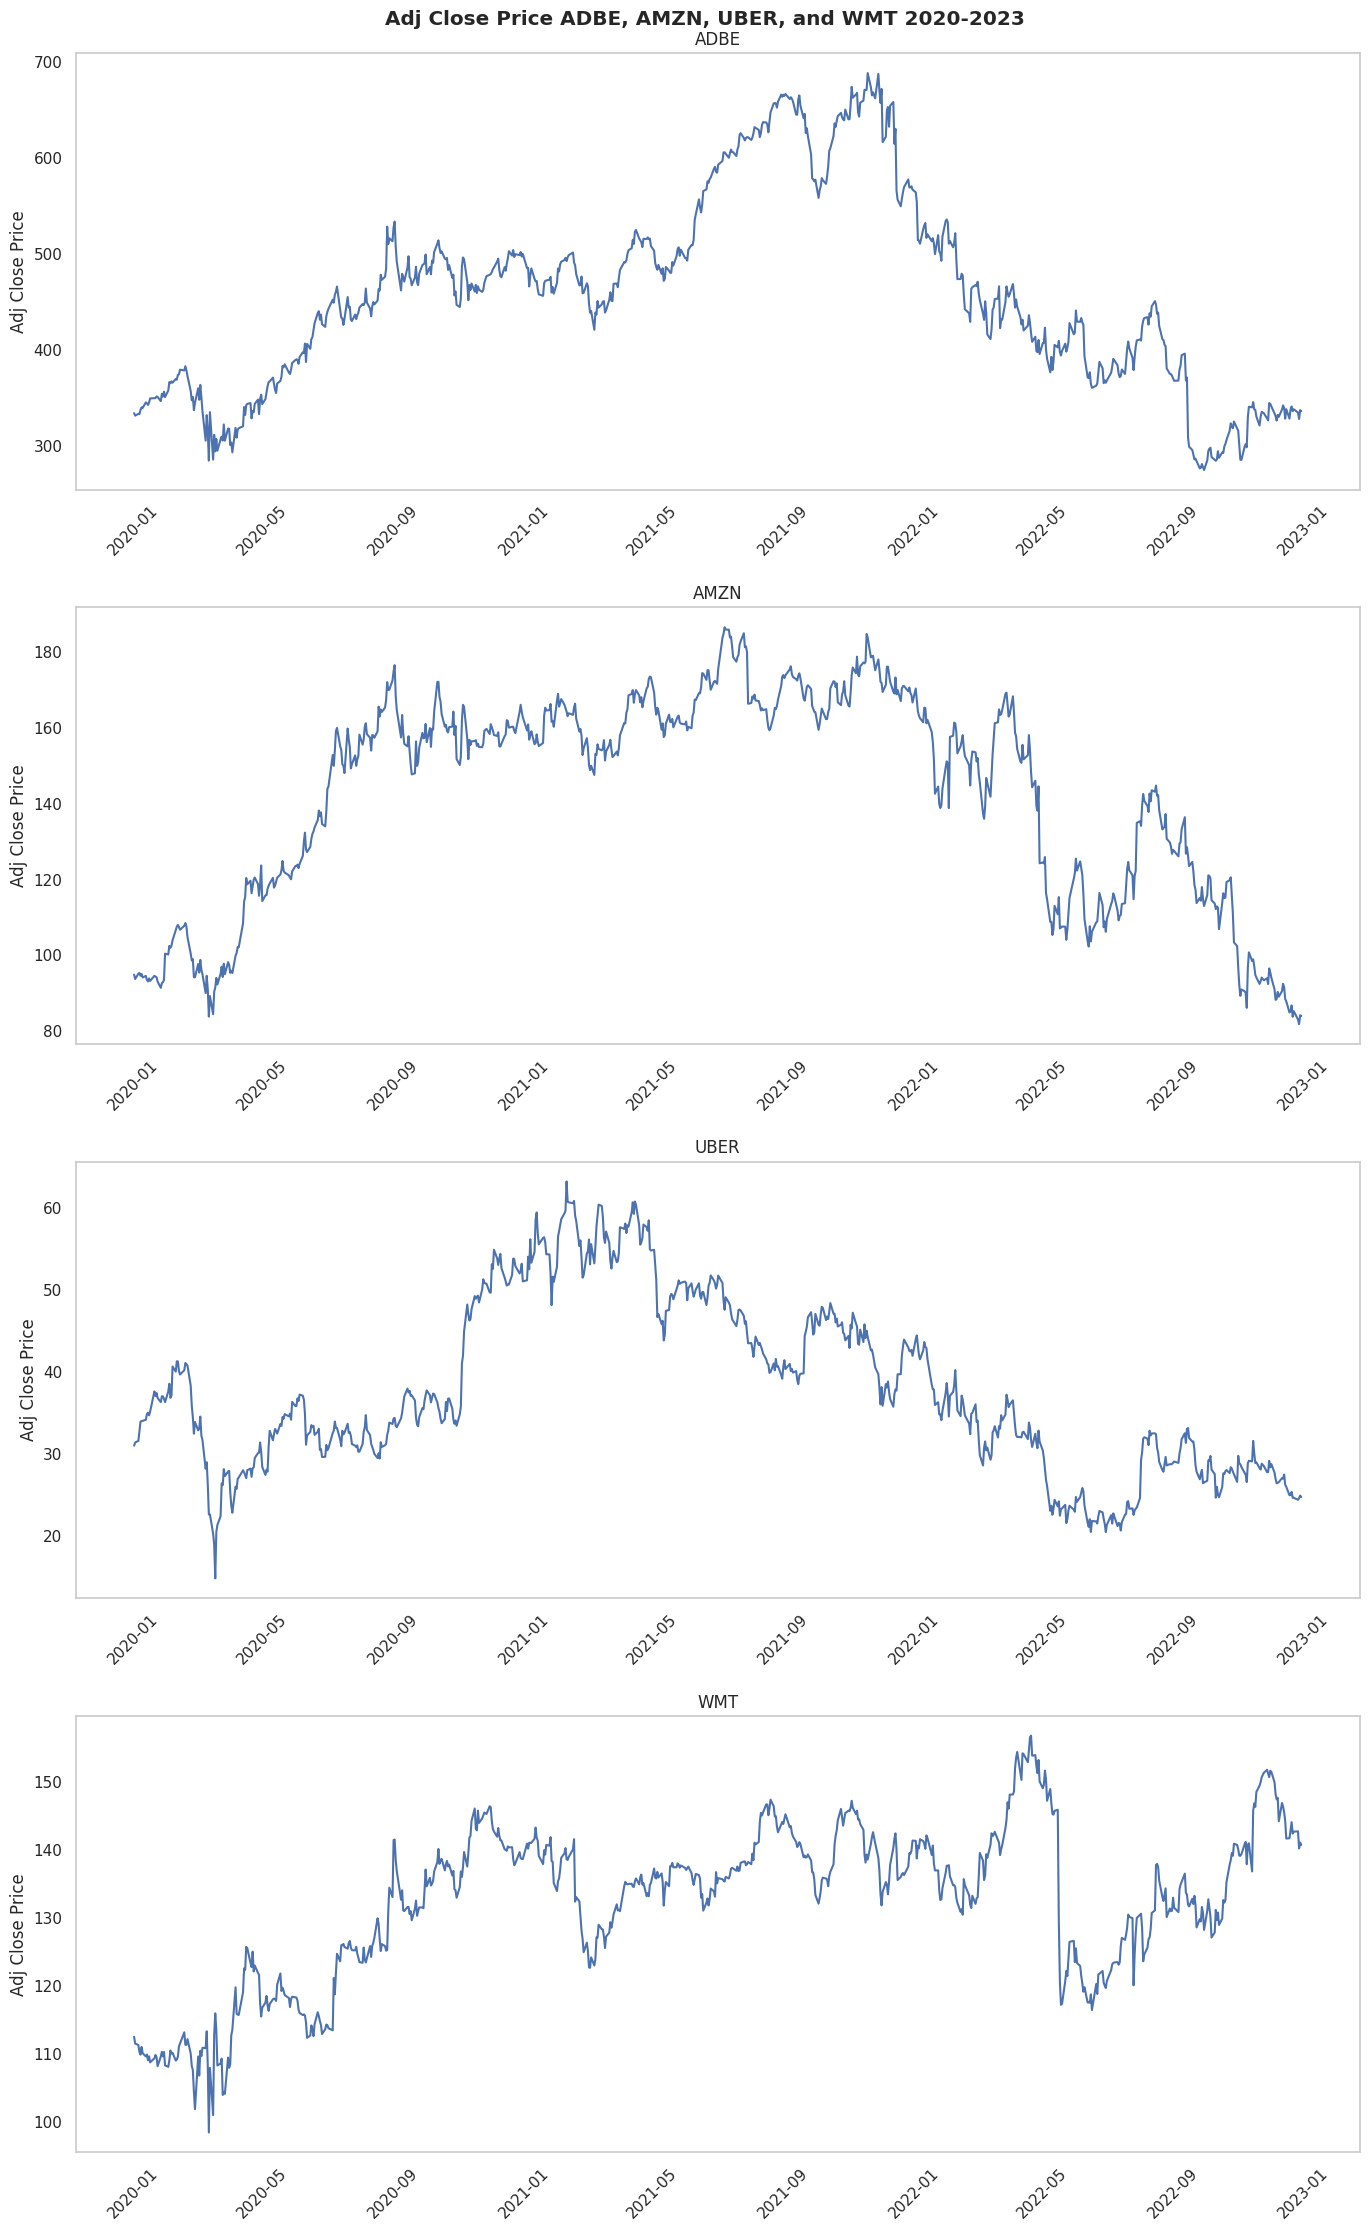

In [ ]:
chart = f'Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2023'

Markdown(""" ### {title} """.format(title=chart))
fig, axes = plt.subplots(4, 1, figsize=(15, 23))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Adj Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Adj Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

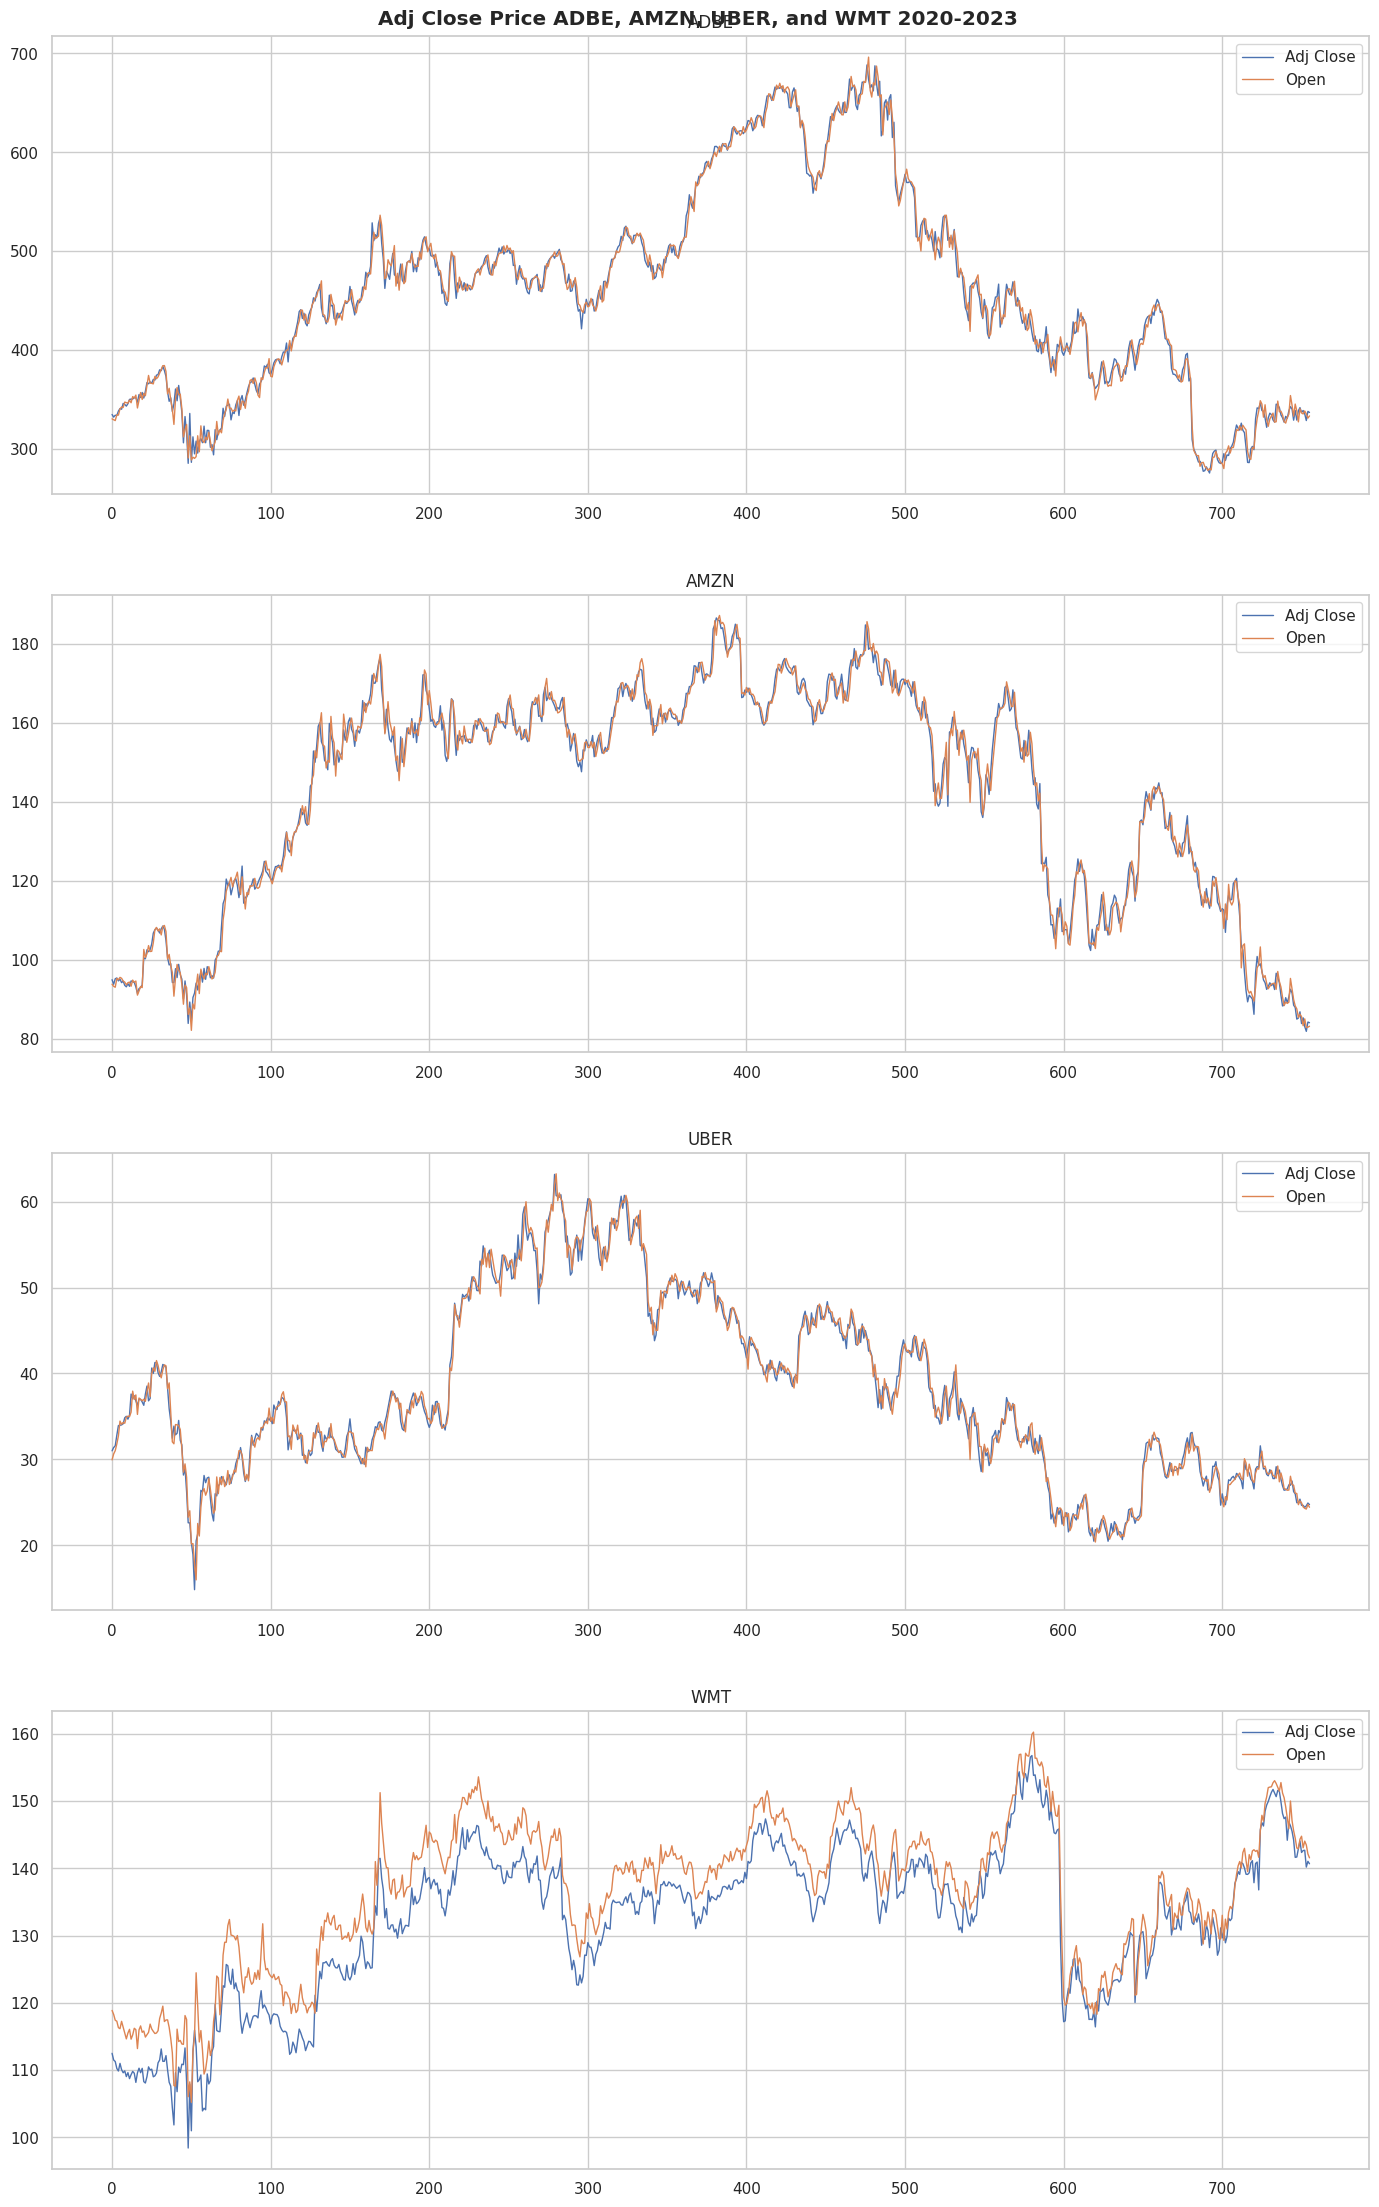

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15,23))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'Open']].plot(ax=ax, linewidth=1)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

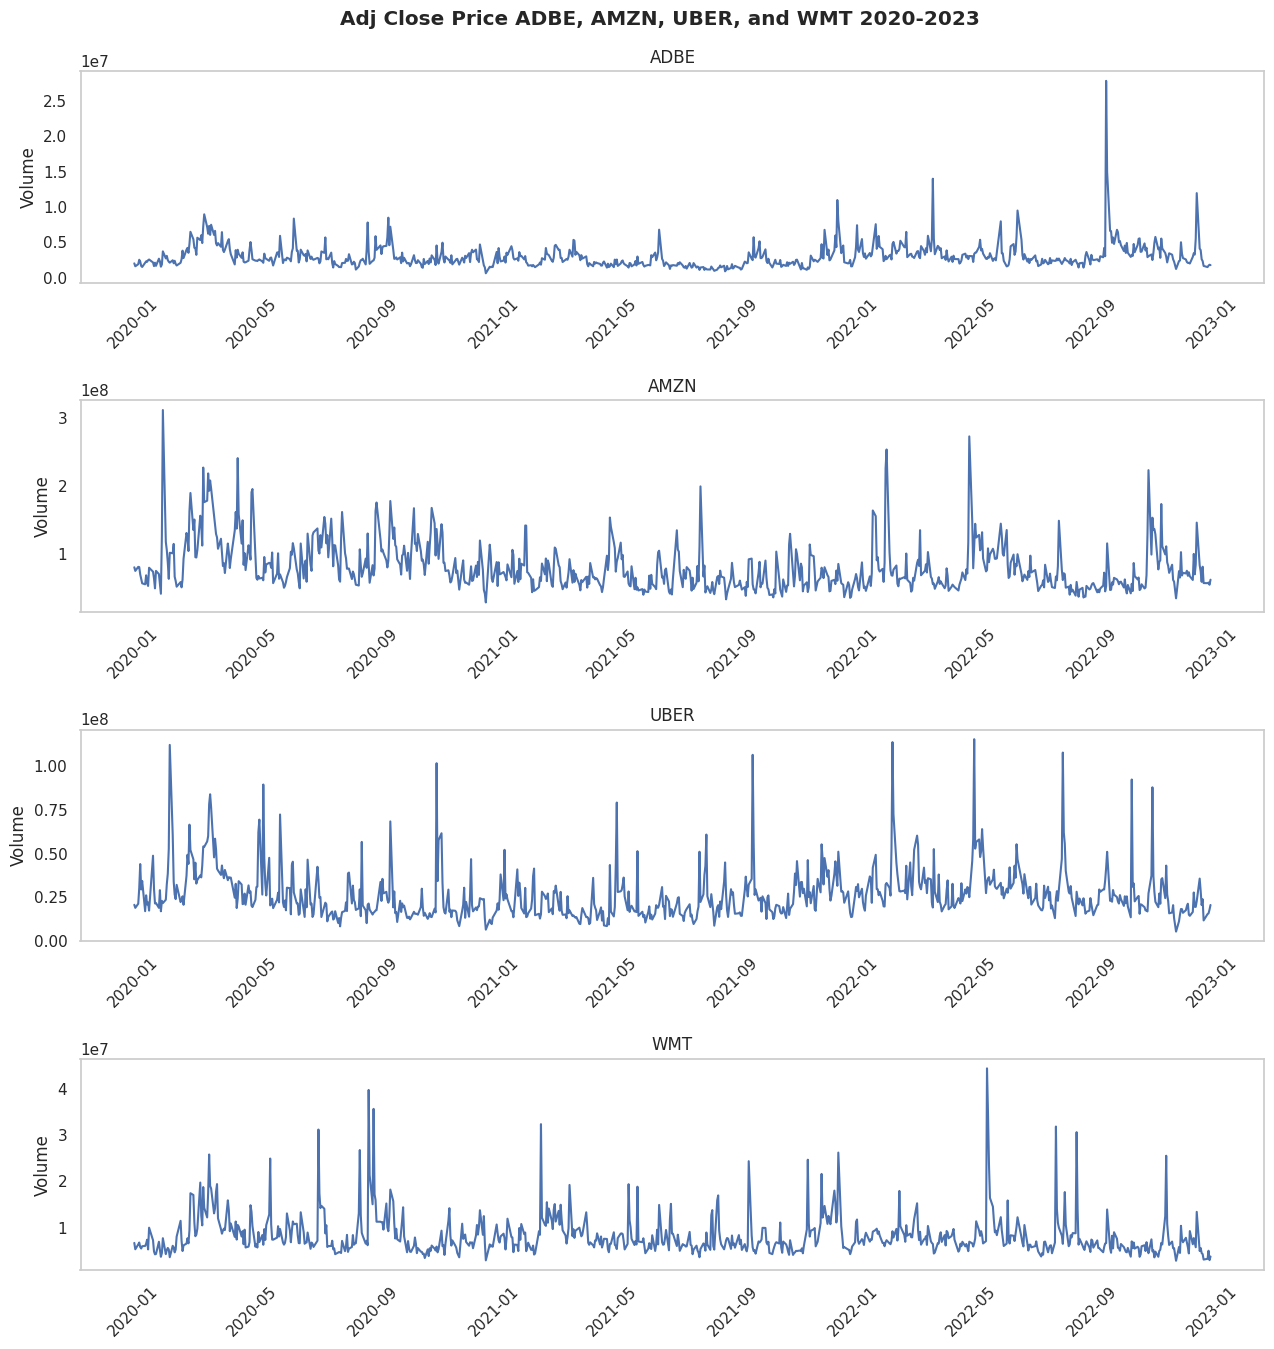

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 14))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

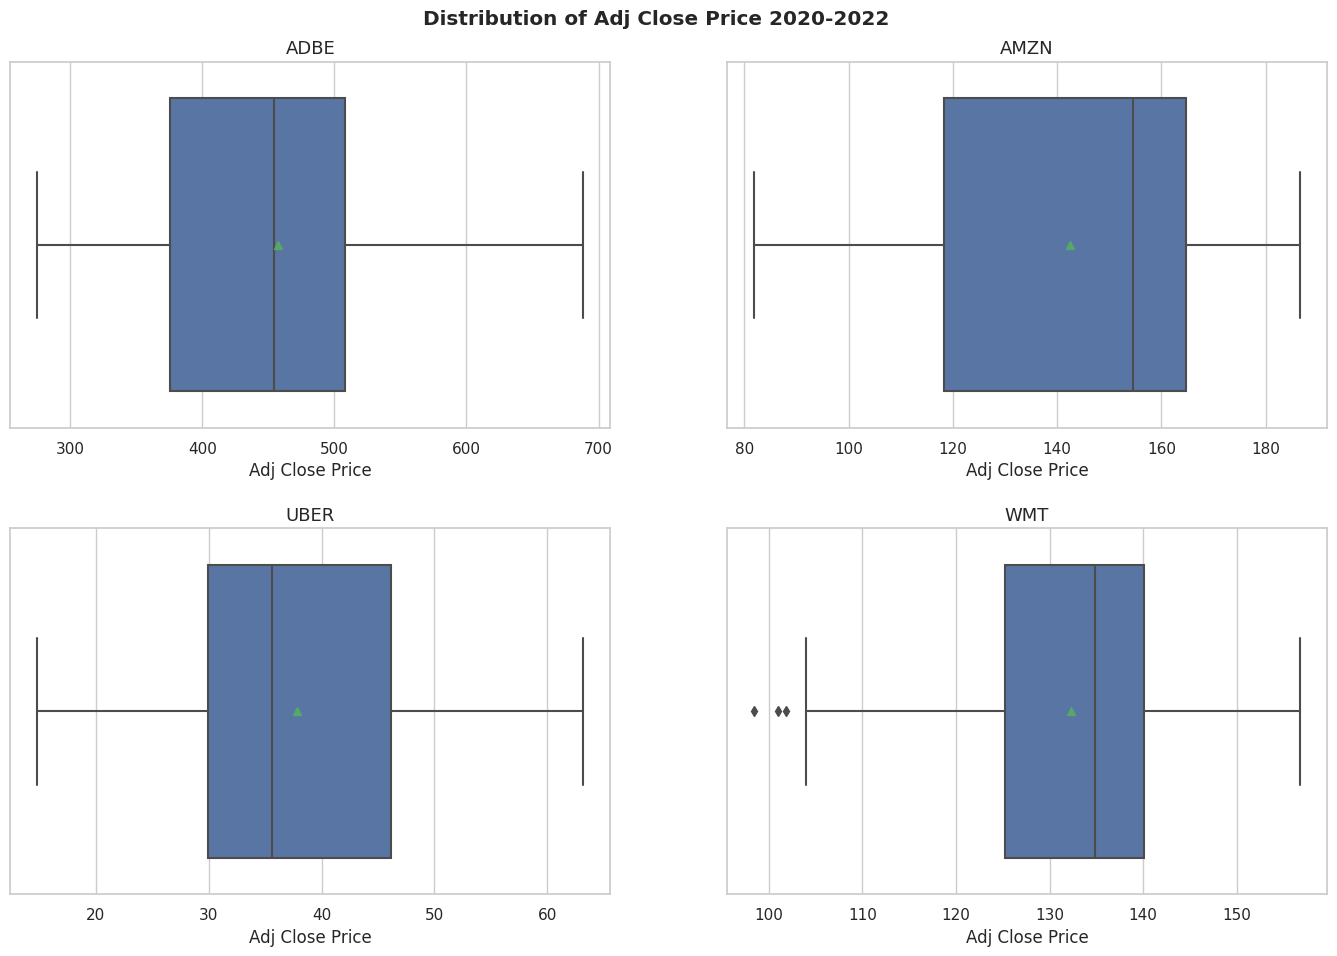

In [ ]:
chart = 'Distribution of Adj Close Price 2020-2022'

Markdown(""" ### {title} """.format(title=chart))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_adbe', 'g_amzn', 'g_uber', 'g_wmt']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Adj Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

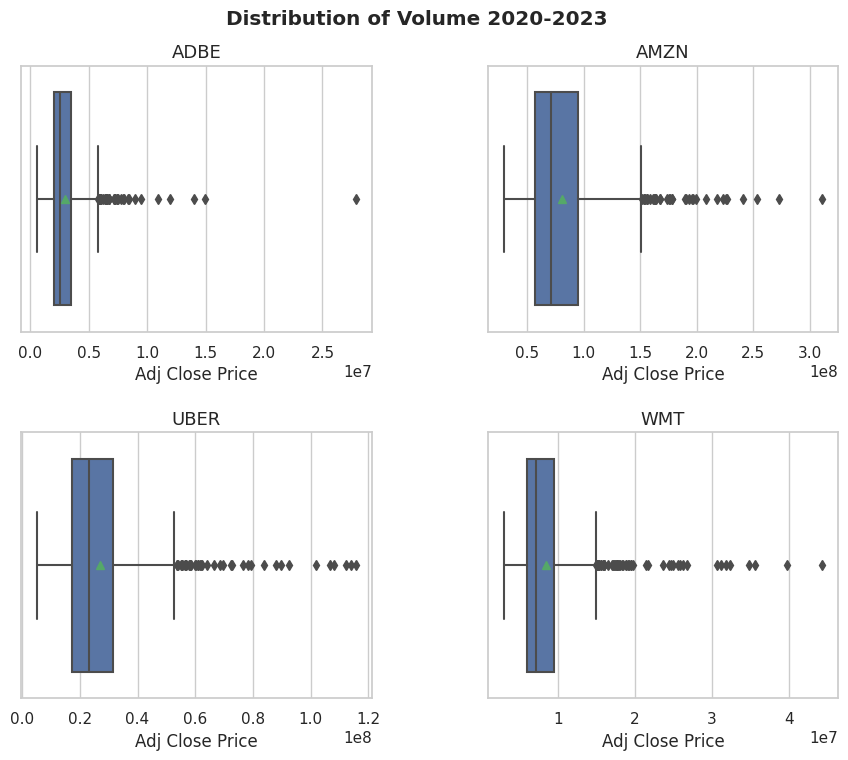

In [ ]:
chart = 'Distribution of Volume 2020-2023'

Markdown(""" ### {title} """.format(title=chart))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_adbe', 'g_amzn', 'g_uber', 'g_wmt']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Volume', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

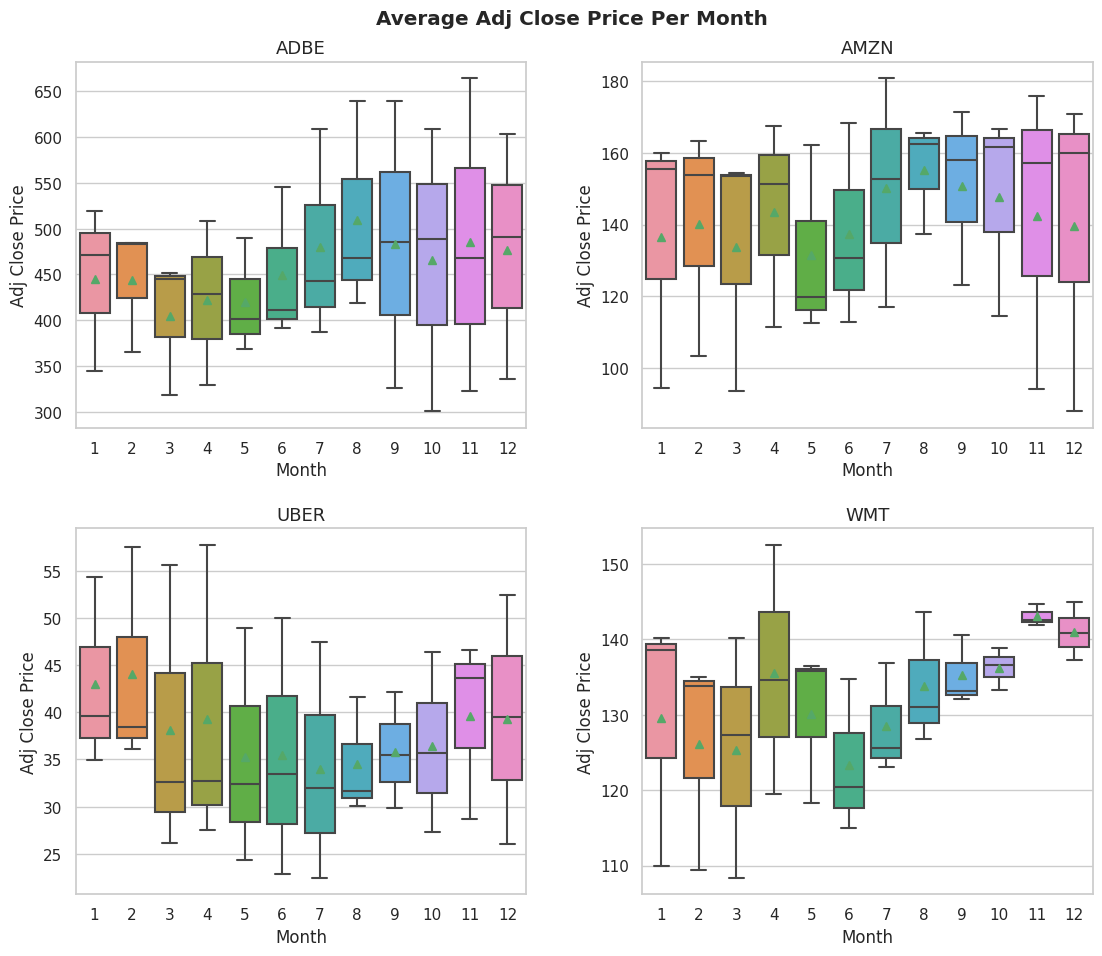

In [ ]:
chart = 'Average Adj Close Price Per Month'

Markdown(""" ### {title} """.format(title=chart))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)
stock_resample = ['adbe_sample', 'amzn_sample', 'uber_sample', 'wmt_sample']

for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Adj Close",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')

plt.show()

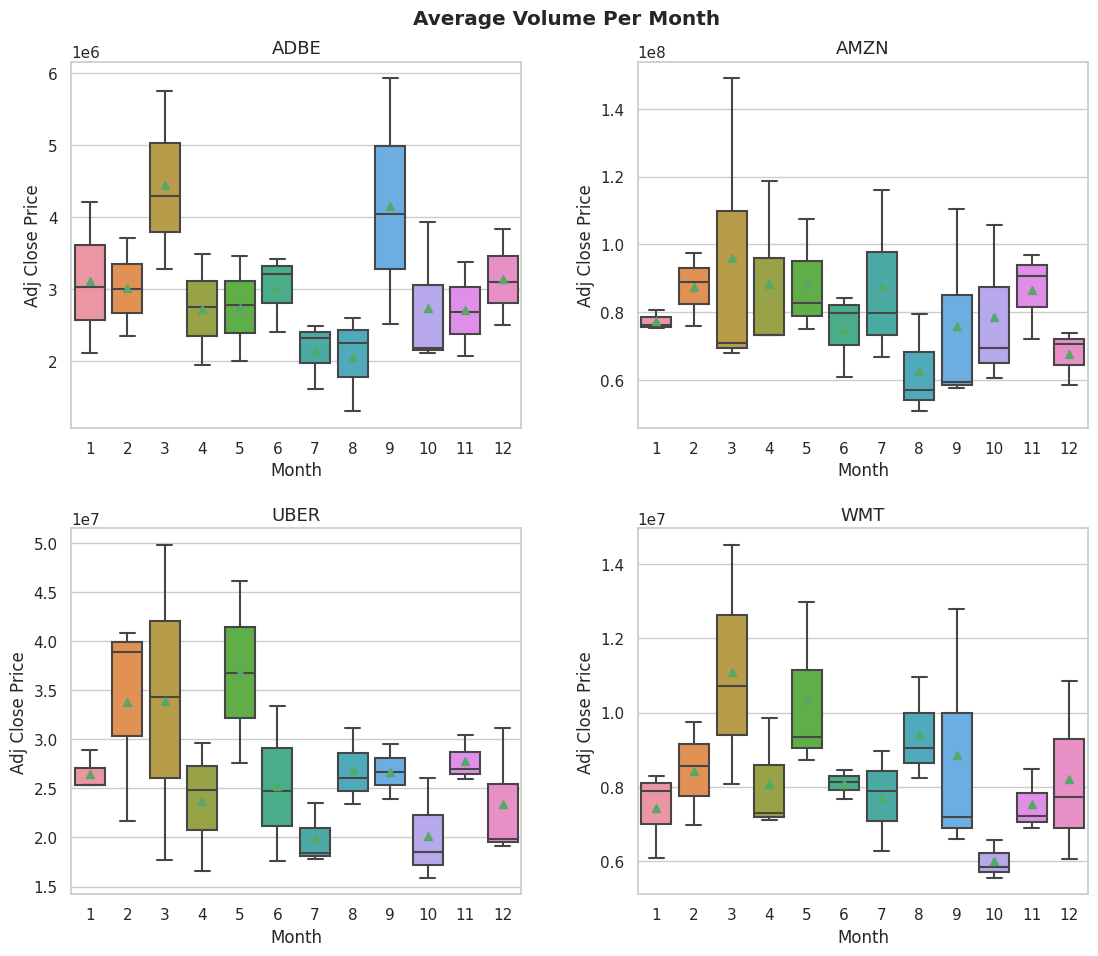

In [ ]:
chart = 'Average Volume Per Month'

Markdown(""" ### {title} """.format(title=chart))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Volume",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')

plt.show()

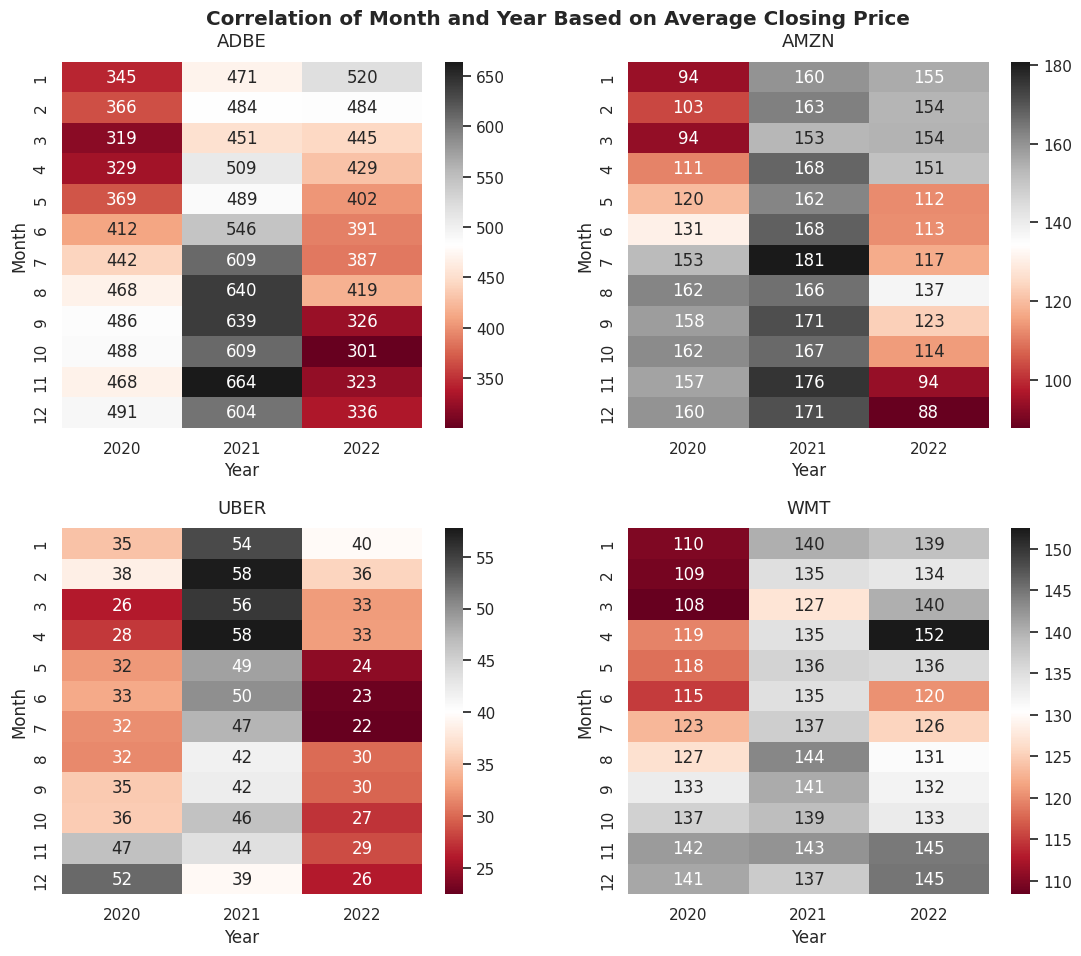

In [ ]:
chart = 'Correlation of Month and Year Based on Average Closing Price'

Markdown(""" ### {title} """.format(title=chart))

stock_pivot =['adbe_pivot', 'amzn_pivot', 'uber_pivot', 'wmt_pivot']

for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Month"] = globals()[y].index.month
    globals()[y]["Year"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot(index="Month", columns="Year", values="Adj Close")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'RdGy', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')

plt.show()

In [ ]:
stocks_code = ['ADBE', 'AMZN', 'UBER', 'WMT']

closing_df = yf.download(stocks_code, '2020-01-01' , '2022-12-30')['Adj Close']

closing_df.rename(columns = {'ADBE':'ADBE', 'AMZN':'AMZN', 'UBER':'UBER', 'WMT':'WMT'}, inplace = True)

stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%***********************]  4 of 4 completed


,ADBE,AMZN,UBER,WMT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.007834,-0.012139,0.012262,-0.008828
2020-01-06,0.005726,0.014886,0.006694,-0.002036
2020-01-07,-0.000959,0.002092,0.038949,-0.009265
2020-01-08,0.013438,-0.007809,0.034136,-0.003432


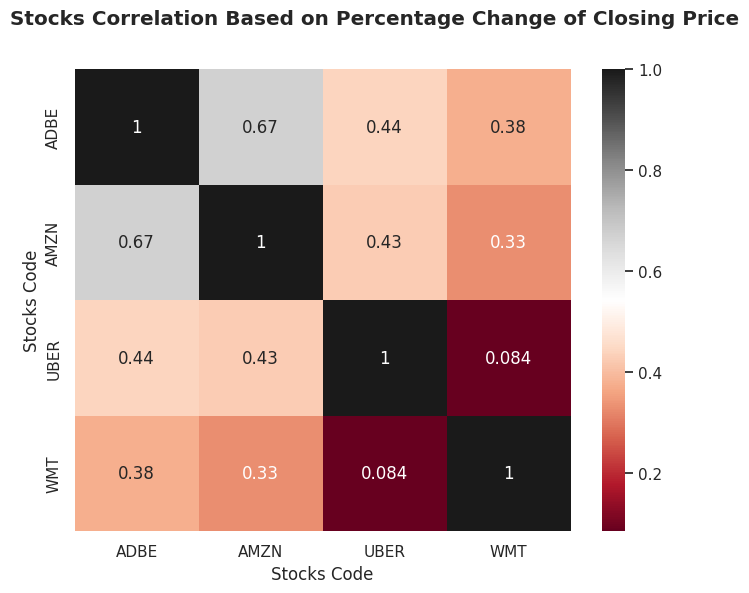

In [ ]:
chart = 'Stocks Correlation Based on Percentage Change of Closing Price'

Markdown(""" ### {title} """.format(title=chart))

plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart}', fontweight='bold')

g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'RdGy')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

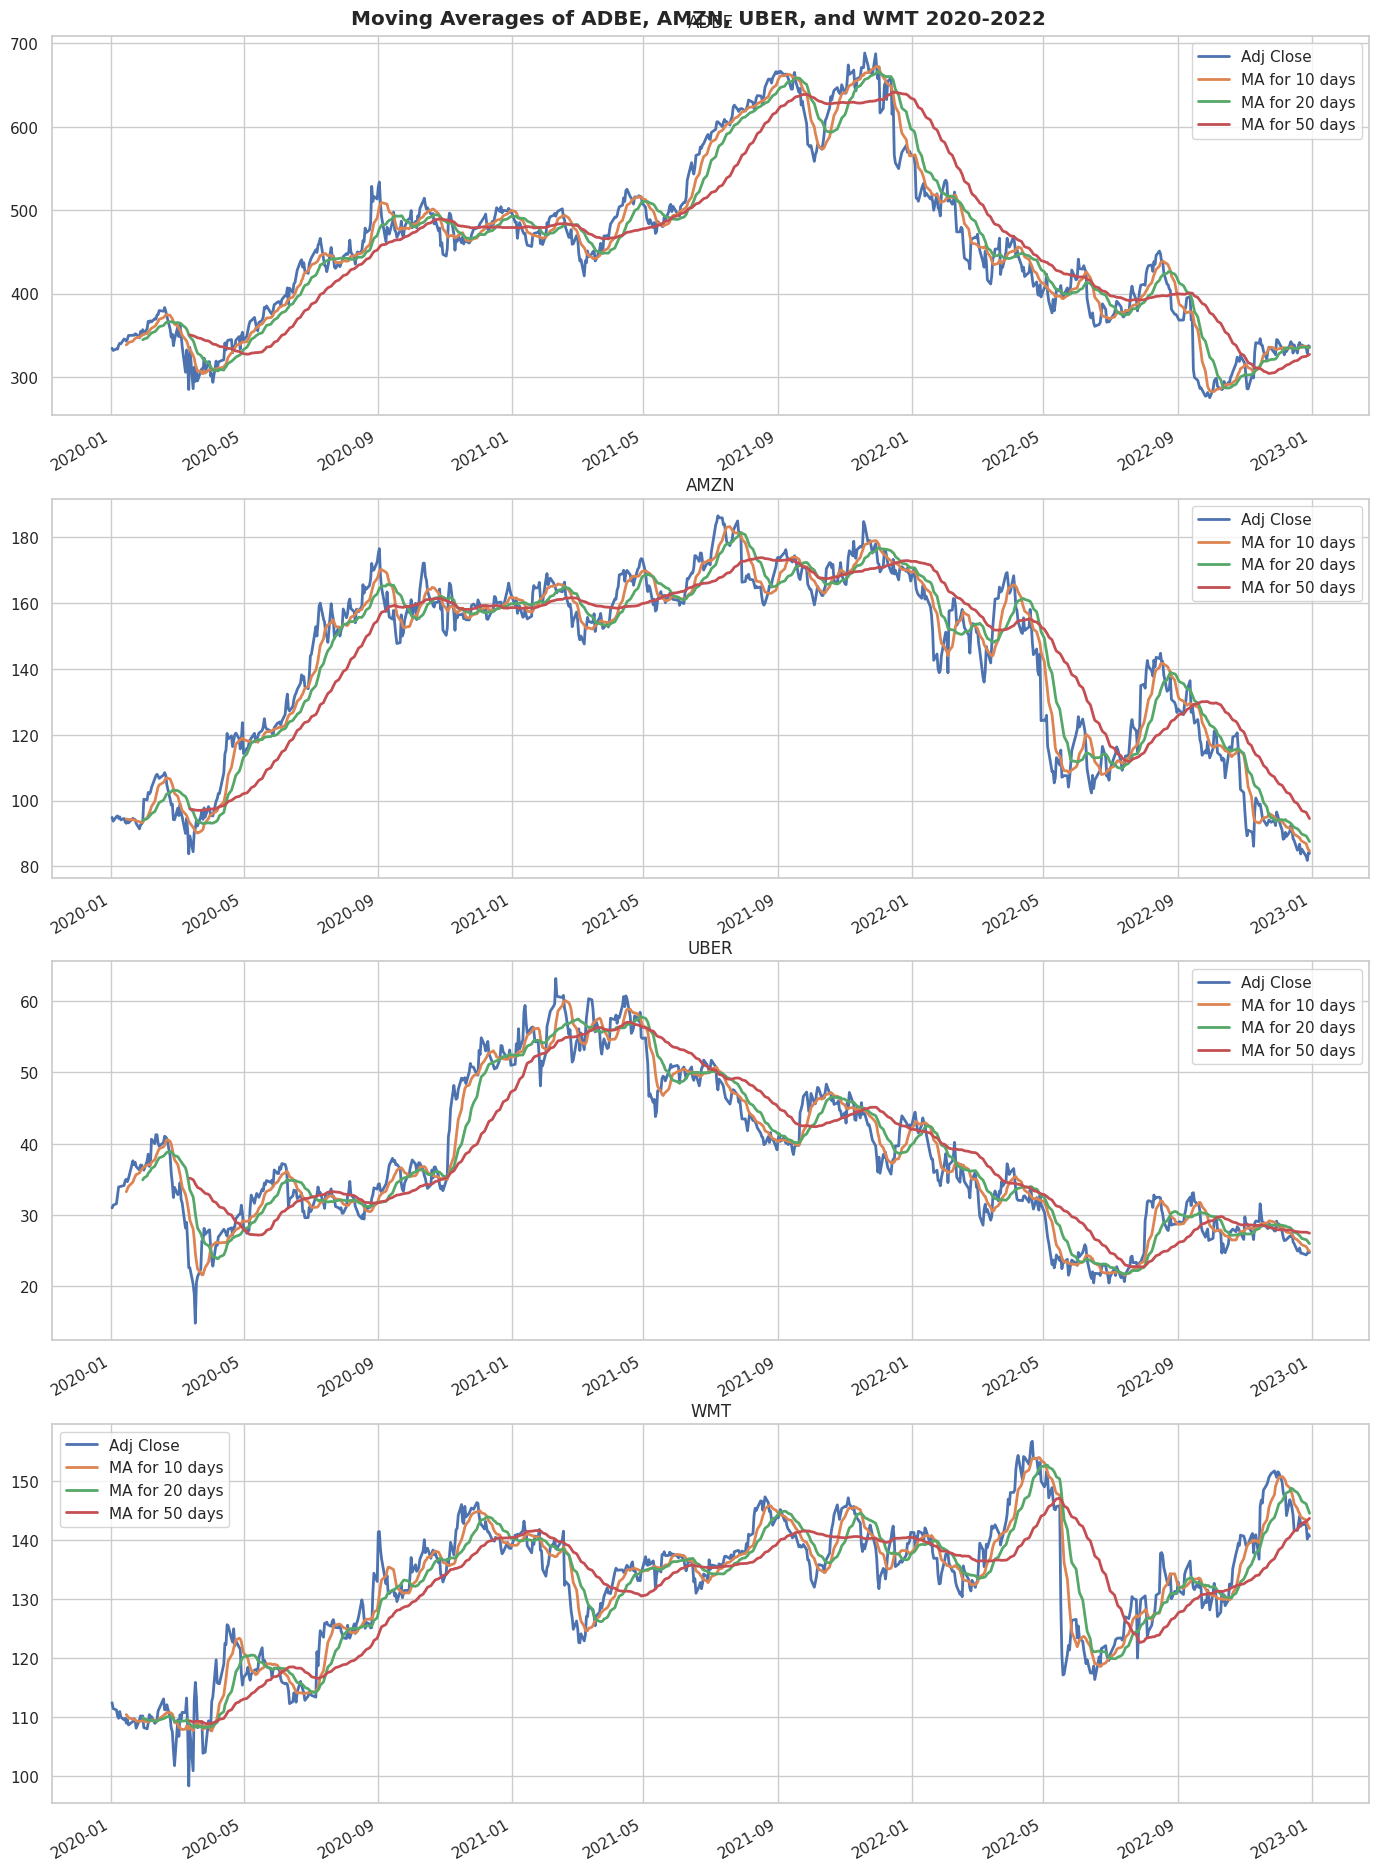

In [ ]:
chart = f'Moving Averages of {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))

fig, axes = plt.subplots(4, 1, figsize=(15, 23))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

for x, y, ax in zip(stock_ma, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=2)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

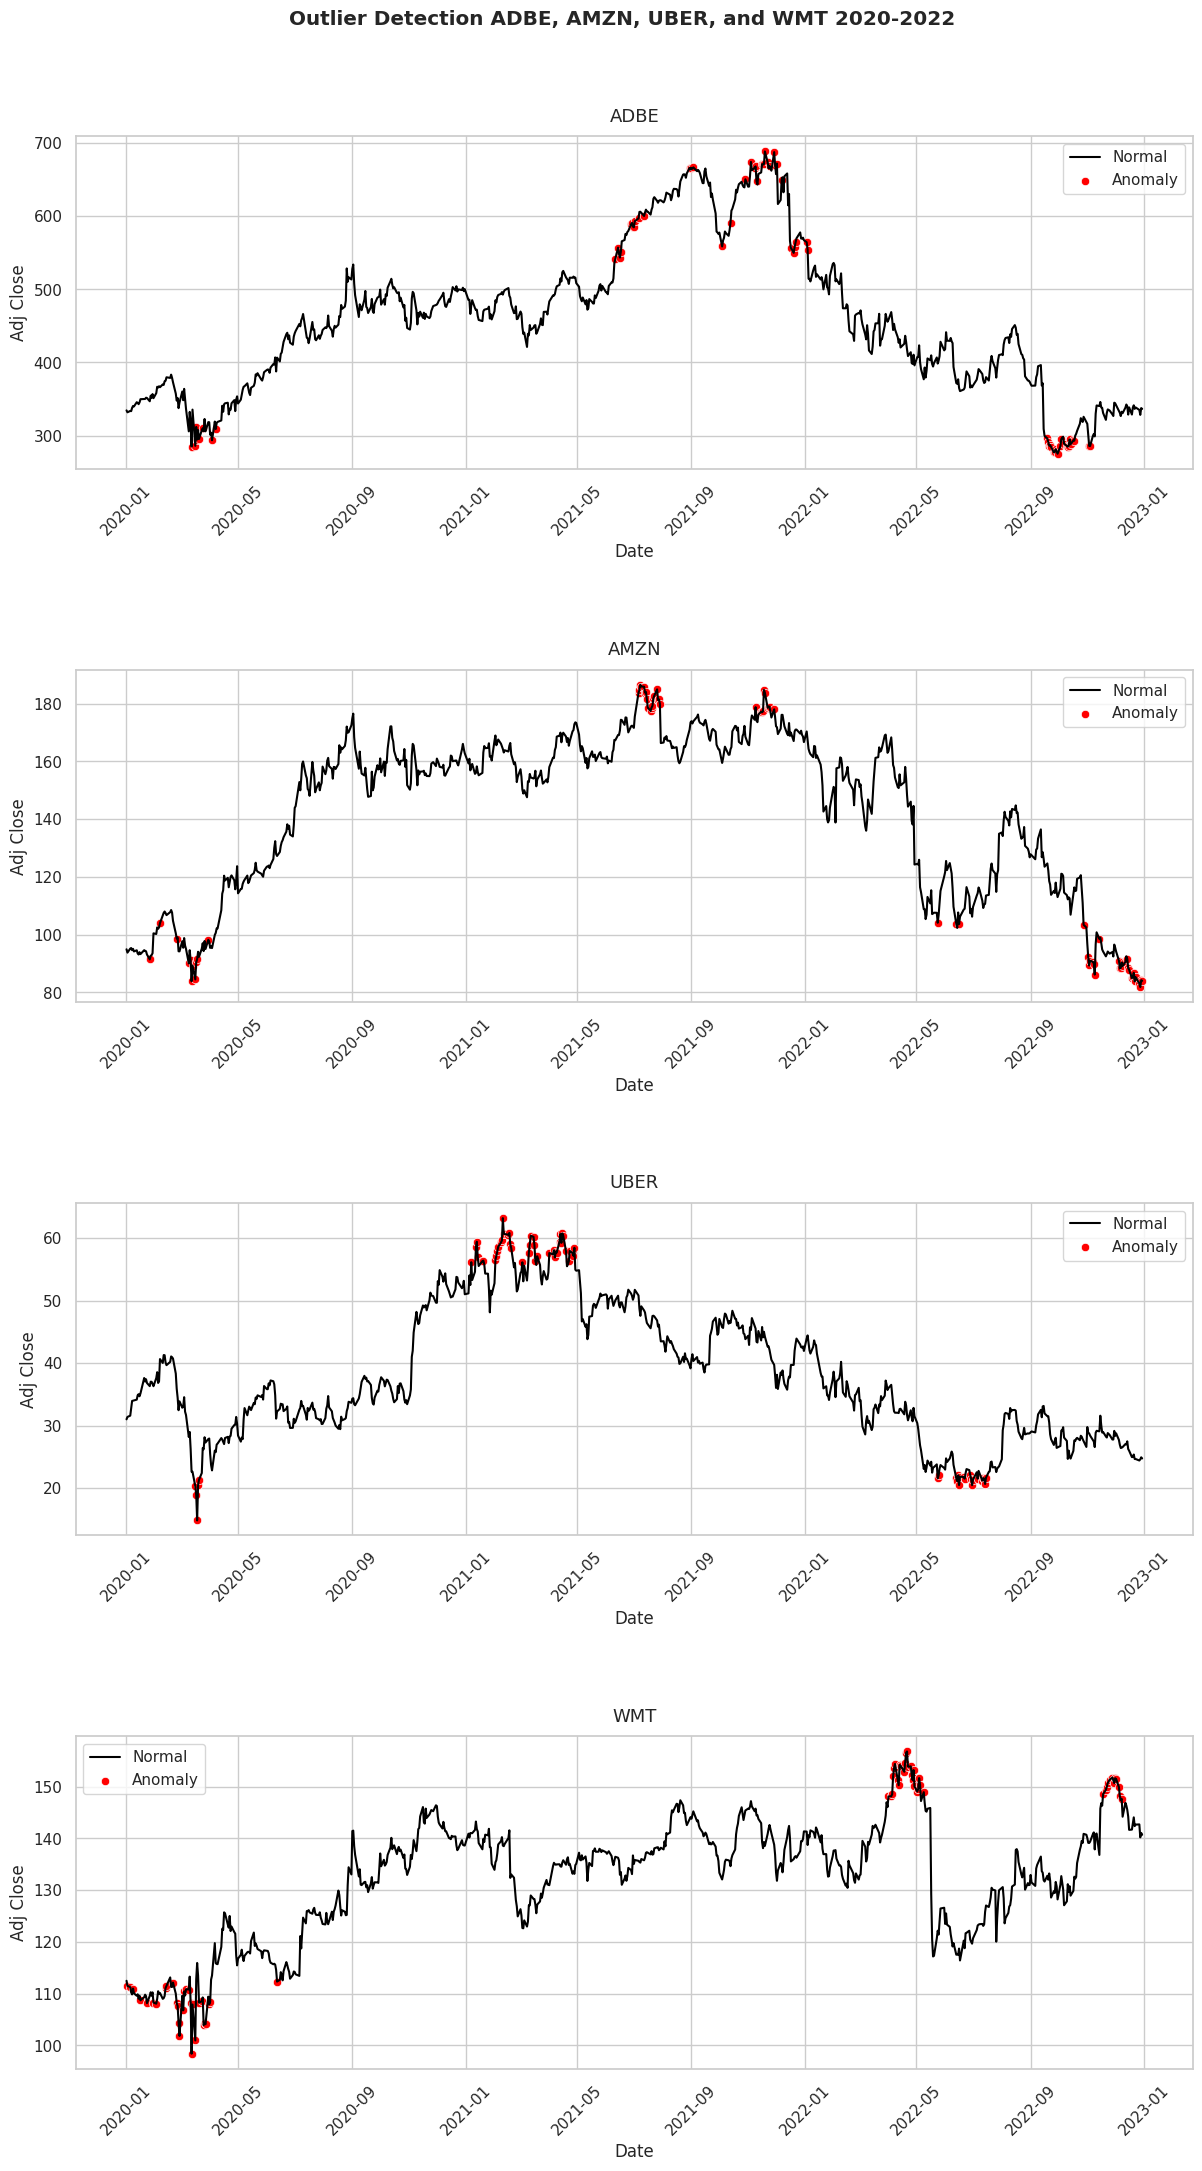

In [ ]:
chart = f'Outlier Detection {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown(""" ### {title} """.format(title=chart))

fig, axes = plt.subplots(4, 1, figsize=(15, 23))
fig.tight_layout()
fig.tight_layout(pad=10)

fig.suptitle(f'{chart}', fontweight='bold')

for x in stock_ma:
    outliers_fraction = float(.09)
    scaler = StandardScaler()
    globals()[x]['Adj_Close'] = globals()[x]['Adj Close']
    np_scaled = scaler.fit_transform(globals()[x].Adj_Close.values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    globals()[x]['anomaly'] = model.predict(data)

for x, y, ax in zip(stock_ma, stock_code, axes.flatten()):
    a = globals()[x].loc[globals()[x]['anomaly'] == -1, ['Adj Close']]
    g = sns.lineplot(data=globals()[x], x="Date", y='Adj Close', color='black', label = 'Normal', ax=ax)
    g.tick_params(axis='x', rotation=45)
    g.set_title(y, fontweight="normal", size=13, y=1.02)
    g2= sns.scatterplot(data=a,x=a.index,y=a['Adj Close'], color='red', label = 'Anomaly', ax=ax)

plt.show()

In [ ]:
chart = f'{stock_code[0]} Forecasting'

Markdown(""" ### {title} """.format(title=chart))

data = adbe_ma.filter(['Adj Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.14335499, 0.13701379, 0.14161237, 0.14083792, 0.15168087,
       0.15792532, 0.15637628, 0.17046251, 0.1680422 , 0.16395187,
       0.16985743, 0.18040996, 0.18103926, 0.18118447, 0.18529903,
       0.18435507, 0.17353628, 0.19224531, 0.18505699, 0.19735213,
       0.18379845, 0.20040175, 0.22155525, 0.21867507, 0.22329788,
       0.21998206, 0.22944549, 0.22770286, 0.23982864, 0.24115978,
       0.25284993, 0.25086526, 0.26158722, 0.25113146, 0.23658543,
       0.19897378, 0.17571455, 0.18428247, 0.15083375, 0.16922813,
       0.20592006, 0.17702153, 0.21456059, 0.18353218, 0.14901851,
       0.07403732, 0.13839339, 0.09688506, 0.02371902, 0.14594474,
       0.02621194, 0.08860756, 0.04697818, 0.07820025, 0.04874503,
       0.07761933, 0.08422681, 0.07432774, 0.11489218, 0.07413407])]
[0.1045332532077915]

[array([0.14335499, 0.13701379, 0.14161237, 0.14083792, 0.15168087,
       0.15792532, 0.15637628, 0.17046251, 0.1680422 , 0.16395187,
       0.16985743, 0.18040996, 0.181

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))/10
rmse

2/2 [==============================] - 0s 12ms/step


1.2624328765544761

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

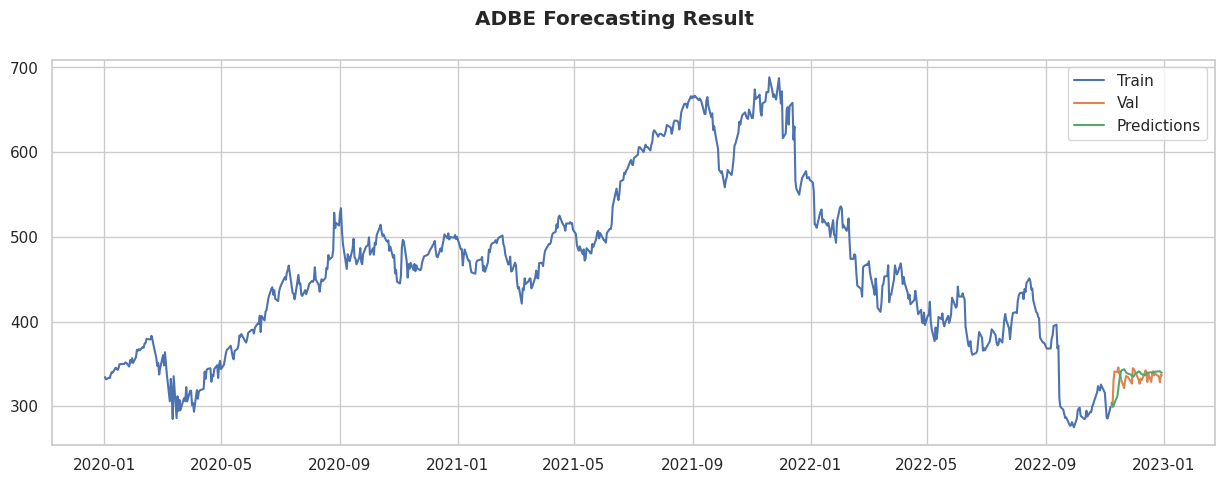

In [ ]:
chart = f'{stock_code[0]} Forecasting Result'

Markdown(""" ### {title} """.format(title=chart))

plt.figure(figsize=(15, 5))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=1.5)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

plt.show()

In [ ]:
chart = f'{stock_code[1]} Forecasting'

Markdown(""" ### {title} """.format(title=chart))

data = amzn_ma.filter(['Adj Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.1248729 , 0.11387533, 0.12719746, 0.12909727, 0.12198991,
       0.12632397, 0.11778462, 0.12167009, 0.11123575, 0.10769398,
       0.11529304, 0.10898278, 0.12200418, 0.11983715, 0.11846241,
       0.10751263, 0.09161771, 0.10350785, 0.10577517, 0.1118276 ,
       0.17771751, 0.17556002, 0.19726396, 0.1925862 , 0.19753126,
       0.21139754, 0.23747385, 0.24553584, 0.24992722, 0.24509192,
       0.23793205, 0.24786041, 0.25480549, 0.24663367, 0.21936412,
       0.17798962, 0.16054341, 0.16381307, 0.11832876, 0.11806627,
       0.15157448, 0.13011396, 0.16201829, 0.13729291, 0.12634305,
       0.07838152, 0.12191831, 0.08804731, 0.01919321, 0.07093045,
       0.02517885, 0.08183253, 0.09241007, 0.11672023, 0.10009019,
       0.12717365, 0.14496349, 0.11906388, 0.15230953, 0.1258705 ])]
[0.15634773180813188]

[array([0.1248729 , 0.11387533, 0.12719746, 0.12909727, 0.12198991,
       0.12632397, 0.11778462, 0.12167009, 0.11123575, 0.10769398,
       0.11529304, 0.10898278, 0.12

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))/10
rmse

2/2 [==============================] - 0s 15ms/step


0.38121974992217267

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

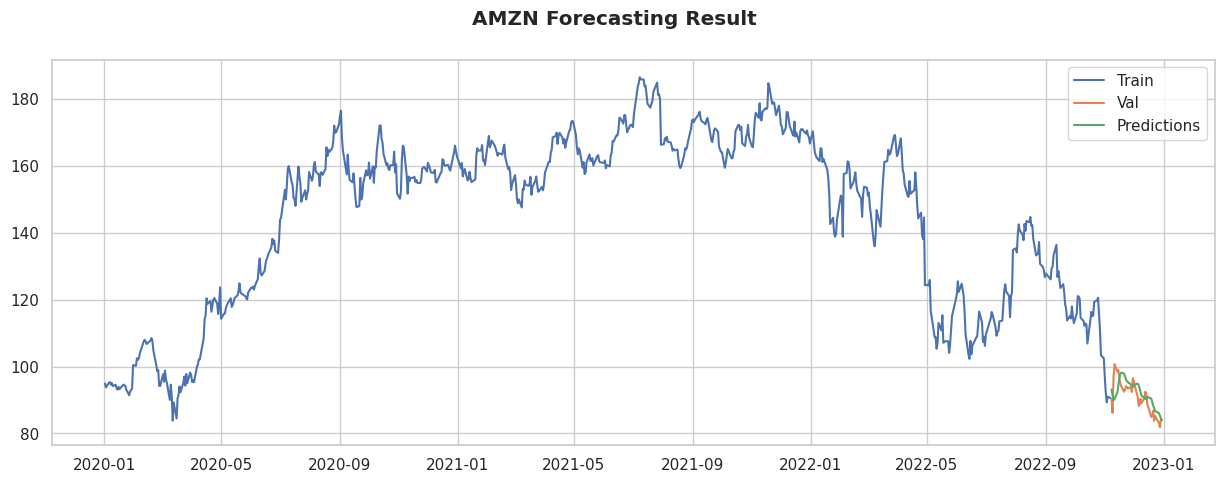

In [ ]:
chart = f'{stock_code[1]} Forecasting Result'

Markdown(""" ### {title} """.format(title=chart))

plt.figure(figsize=(15, 5))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=1.5)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

plt.show()

In [ ]:
chart = f'{stock_code[2]} Forecasting'

Markdown(""" ### {title} """.format(title=chart))

data = uber_ma.filter(['Adj Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.33436724, 0.342225  , 0.34656741, 0.37200168, 0.3951613 ,
       0.39598845, 0.39681552, 0.39950371, 0.4139785 , 0.41749376,
       0.41066998, 0.41997521, 0.47105042, 0.45947066, 0.46691484,
       0.45450784, 0.44416872, 0.45885026, 0.45843676, 0.45202648,
       0.44396197, 0.47084368, 0.4902812 , 0.45471467, 0.46050455,
       0.53370556, 0.52088499, 0.54693963, 0.54652605, 0.52253929,
       0.51364764, 0.52440034, 0.54239039, 0.53970219, 0.53556661,
       0.48573204, 0.43569064, 0.405914  , 0.3645575 , 0.39392057,
       0.37282875, 0.37675767, 0.40756821, 0.35959469, 0.34863524,
       0.27605459, 0.29259718, 0.23614557, 0.16108356, 0.16087677,
       0.11311003, 0.08457403, 0.        , 0.11724566, 0.13461539,
       0.1567411 , 0.2392473 , 0.23511168, 0.2750207 , 0.25765097])]
[0.26902398810344547]

[array([0.33436724, 0.342225  , 0.34656741, 0.37200168, 0.3951613 ,
       0.39598845, 0.39681552, 0.39950371, 0.4139785 , 0.41749376,
       0.41066998, 0.41997521, 0.47

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))/10
rmse

2/2 [==============================] - 0s 14ms/step


0.1098143328732993

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

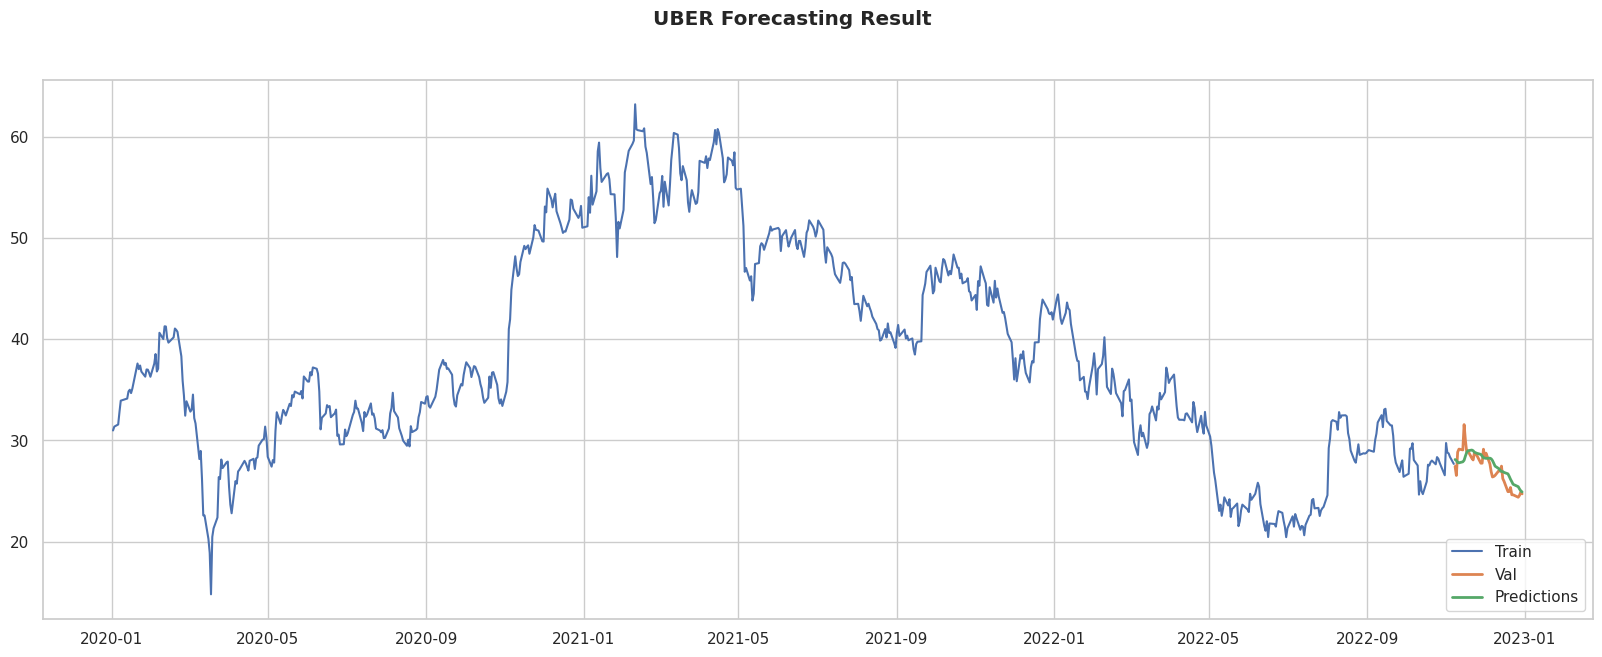

In [ ]:
chart = f'{stock_code[2]} Forecasting Result'

Markdown(""" ### {title} """.format(title=chart))

plt.figure(figsize=(20, 7))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [ ]:
chart = f'{stock_code[3]} Forecasting'

Markdown(""" ### {title} """.format(title=chart))

data = wmt_ma.filter(['Adj Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.24128134, 0.22426673, 0.2203778 , 0.20271505, 0.19623345,
       0.2156785 , 0.19979858, 0.19169613, 0.19655739, 0.18197373,
       0.19202019, 0.17678827, 0.18699683, 0.19526125, 0.19056183,
       0.16722772, 0.19137206, 0.20336305, 0.19185809, 0.20303925,
       0.16917212, 0.16560725, 0.18181176, 0.20676621, 0.19866402,
       0.20093262, 0.18148744, 0.18391813, 0.19120996, 0.2169749 ,
       0.22426673, 0.2524625 , 0.22086383, 0.2210258 , 0.23544749,
       0.19882612, 0.16755204, 0.15766703, 0.10289714, 0.05882105,
       0.19169613, 0.14356928, 0.20611782, 0.19234426, 0.213572  ,
       0.21243744, 0.25505477, 0.16820005, 0.        , 0.16285249,
       0.04391307, 0.24646654, 0.30026502, 0.25810994, 0.16891759,
       0.17396331, 0.18617013, 0.0945365 , 0.10137262, 0.09746644])]
[0.1887744277228569]

[array([0.24128134, 0.22426673, 0.2203778 , 0.20271505, 0.19623345,
       0.2156785 , 0.19979858, 0.19169613, 0.19655739, 0.18197373,
       0.19202019, 0.17678827, 0.186

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))/10
rmse

2/2 [==============================] - 1s 13ms/step


0.3581595019157476

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

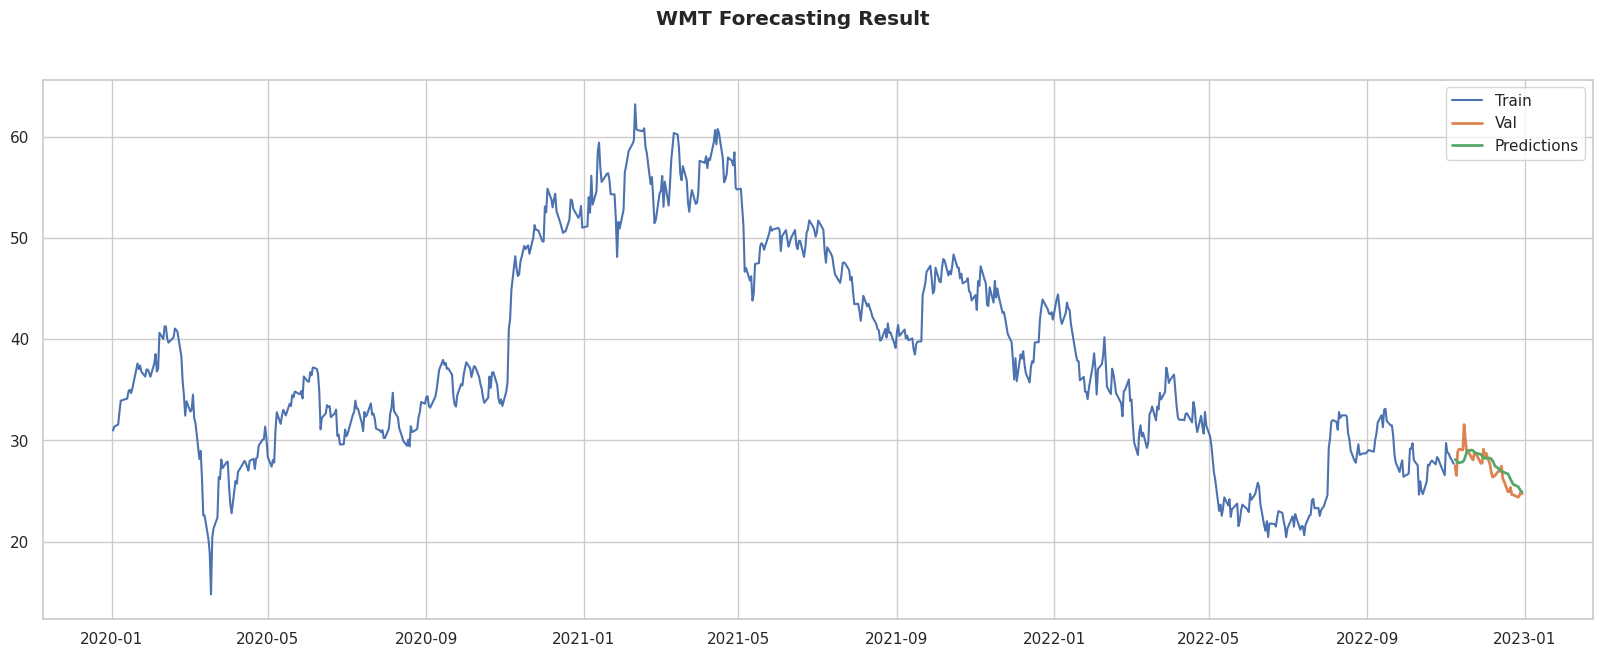

In [ ]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown(""" ### {title} """.format(title=chart))

plt.figure(figsize=(20, 7))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

plt.show()